# DonorsChoose.org
***
<b>Class: </b>CMPE_257 Machine Learning <br>
<b>Team: </b>Vidhi Shah, Sithara KrishnaMurthy, Pragya Gautam, Reetika Goel <br>
***
<b>Business Objective:</b> <br>There is fantastic saying by Mother Teresa that says “It’s not how much we give but how much love we put into giving.”
In this age, technology has made it so much easier for everyone to give and by that it has helped millions of people globally. Donations can be made through a small text message or just a simple click of a button. The team at DonorsChoose.org does an amazing job to support the public education there by bringing classroom dreams to life for teachers and students all over United States.

Speaking about statistics, It has already raised $685 million through 3 million people and partners funding 1.1 million DonorsChoose.org projects. But teachers still spend more than a billion dollars of their own money on classroom materials. To get students what they need to learn and based on the data available regarding the donors, donations and classroom materials requirement, the organization would like to pair up donors to the classroom requests that will most motivate them to make an additional gift.

The email marketing campaigns will surely be able to connect donors with the projects that most inspires them and we “The Seekers” team, as data scientists or as machine learning engineers are ready to take up the challange to find and help them.<br><br>
<b>Kaggle Link:</b> https://www.kaggle.com/donorschoose/io/home

In [339]:
# import libraries
import pandas as pd
import numpy as np
from string import Template

import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
# import pydotplus

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
pd.options.display.float_format = '{:,.2g}'.format
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read csvs
df_donations = pd.read_csv("Donations.csv")
df_donors = pd.read_csv("Donors.csv")
df_projects = pd.read_csv("Projects.csv")
df_schools = pd.read_csv("Schools.csv")
df_resources = pd.read_csv("Resources.csv")
df_teachers = pd.read_csv("Teachers.csv")

In [3]:
# print inital shapes for all csvs
print("Shape of Donations Data:",df_donations.shape,'\n')
print("Shape of Donors Data:",df_donors.shape,'\n')
print("Shape of Projects Data:",df_projects.shape,'\n')

Shape of Donations Data: (4687884, 7) 

Shape of Donors Data: (2122640, 5) 

Shape of Projects Data: (1110017, 18) 



In [4]:
donations_resources = pd.merge(df_donations,df_resources, how='left',on='Project ID')

In [5]:
donations_resources_donors = pd.merge(donations_resources, df_donors, how='left', on='Donor ID')

In [6]:
donations_resources_donors_projects = pd.merge(donations_resources_donors, df_projects, how='left', on='Project ID')

In [7]:
donations_resources_donors_projects_teachers = pd.merge(donations_resources_donors_projects, df_teachers, how='left', on='Teacher ID')

In [8]:
merged_df = pd.merge(donations_resources_donors_projects_teachers, df_schools, how='left', on='School ID')

In [118]:
merged_df.head(1)

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Resource Item Name,Resource Quantity,Resource Unit Price,...,Teacher Prefix,Teacher First Project Posted Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,chair move and store cart,1.0,350.0,...,Mr.,2015-09-19,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District


In [117]:
merged_df.iloc[:,1:]

,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name,...,Teacher Prefix,Teacher First Project Posted Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57,chair move and store cart,1.0,350.00,NaN,...,Mr.,2015-09-19,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District
1,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23,chair move and store cart,1.0,350.00,NaN,...,Mr.,2015-09-19,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District
2,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46,chair move and store cart,1.0,350.00,NaN,...,Mr.,2015-09-19,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District
3,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04,chair move and store cart,1.0,350.00,NaN,...,Mr.,2015-09-19,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District
4,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38,chair move and store cart,1.0,350.00,NaN,...,Mr.,2015-09-19,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District
5,8cea27f0cc03f41f66aab96b284ae6a1,896c75c9b8d9a91c759746e566cd3f37,Yes,15.00,1,2016-06-04 17:58:55,chair move and store cart,1.0,350.00,NaN,...,Mr.,2015-09-19,Oquirrh Hills Middle School,suburban,23.0,Utah,84065.0,Riverton,Salt Lake,Jordan School District
6,39af862cb04e4f938e5b827236a610a6,8a1875762c85932fff192ea126ccdff2,Yes,50.00,1,2013-02-27 09:07:51,sony mdr zx100 blk headphones,40.0,12.86,CDW-G,...,Mr.,2013-02-02,Mott Hall IV,urban,92.0,New York,11233.0,New York City,Kings (Brooklyn),New York City Dept Of Ed
7,c47f78571f62bcf10eee6a46a4a8a85d,a3f070e439d52de72ca62dc41f9b16a4,Yes,50.00,2,2013-02-27 09:53:12,sony mdr zx100 blk headphones,40.0,12.86,CDW-G,...,Mr.,2013-02-02,Mott Hall IV,urban,92.0,New York,11233.0,New York City,Kings (Brooklyn),New York City Dept Of Ed
8,19351e1d9ae0bccab31b1f6009ad47a3,bd323208dc78b1c74b62664b768f3176,Yes,200.00,2,2013-02-17 21:36:24,sony mdr zx100 blk headphones,40.0,12.86,CDW-G,...,Mr.,2013-02-02,Mott Hall IV,urban,92.0,New York,11233.0,New York City,Kings (Brooklyn),New York City Dept Of Ed
9,d5364b1bb3b14594808bd6efa7544165,6dd6113f89f2766d3b0707ef2a46260c,Yes,10.00,44,2013-02-27 10:32:22,sony mdr zx100 blk headphones,40.0,12.86,CDW-G,...,Mr.,2013-02-02,Mott Hall IV,urban,92.0,New York,11233.0,New York City,Kings (Brooklyn),New York City Dept Of Ed


In [290]:
df = merged_df.sample(n = 50000, axis = 0).reset_index(drop=True)
df.shape

(50000, 42)

In [291]:
df.head(2)

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Resource Item Name,Resource Quantity,Resource Unit Price,...,Teacher Prefix,Teacher First Project Posted Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,bf83fcff53dcffc4c84cbe19497a0517,238032e19671a660af0972ca4354a531,c7724bf464383dd1296e402dd4479957,Yes,50.0,1,2016-03-23 21:02:30,learning resources mental blox critical thinki...,1.0,18.69,...,Ms.,2013-04-16,Northern Elementary School,unknown,38.0,Kentucky,40324.0,Georgetown,Scott,Scott Co School District
1,8fd73010131921a741db3430c4a27256,d24b1c58707536ddd46473c98553fc14,c74a5037ffd5d1a5bced7c72d93d4abd,Yes,25.0,6,2017-01-14 13:42:25,"uncovering student ideas in science, volume 2:...",1.0,24.32,...,Mrs.,2017-01-13,Roosevelt High School,urban,95.0,Illinois,60625.0,Chicago,Cook,Chicago Psd-Network 1


In [295]:
df = df.sort_values(by=['Project ID','Donor ID']).reset_index(drop=True)

In [296]:
df.head(2)

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Resource Item Name,Resource Quantity,Resource Unit Price,...,Teacher Prefix,Teacher First Project Posted Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00002d44003ed46b066607c5455a999a,1abb69e9f91e80a4c0f61e61b380b852,43ca9835ccb5c7c24abd3f173732d26f,Yes,100.0,2,2017-06-28 22:56:05,cf520x - giant comfy pillows - set of 4,1.0,269.00,...,Mrs.,2017-06-20,A H Watwood Elementary School,town,80.0,Alabama,35044.0,Childersburg,Talladega,Talladega Co School District
1,0000df38a6d3a23d2a9ddb7beaa540ca,3a8624fc904b8f138aea389287350fe5,13dbfc3ea9838315205b064333513450,Yes,50.0,3,2017-10-02 12:06:10,electric pencil sharpener - charcoal,1.0,33.59,...,Mrs.,2017-10-02,Kennedy Elementary School,town,62.0,Montana,59701.0,Butte,Silver Bow,Butte School District 1


In [297]:
n_rows = 10000
df_sample_1 = df.sample(n = n_rows, random_state = 123, axis = 0).reset_index(drop=True)
df_sample_1.shape

(10000, 42)

In [298]:
df_sample_1.head(2)

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Resource Item Name,Resource Quantity,Resource Unit Price,...,Teacher Prefix,Teacher First Project Posted Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,3cbb50fc0bfde8922f67542e1af78b60,1a52161596aff530593ae50b54456cbf,e27fb1a80a3921e431baa56a3b66fd5b,No,100.0,1,2015-09-28 16:31:01,wonder workshop dash & dot robot wonder pack,1.0,279.99,...,Mr.,2015-09-27,Lower Creek Elementary School,urban,43.0,North Carolina,28645.0,Lenoir,Caldwell,Caldwell Co School District
1,d08fa4c49e879d46d01867817a9f5e7d,2fa2310748699d0232f9f051cc1c4577,be833db4f16df25696356b1194a14308,Yes,1.0,740,2014-04-22 21:14:21,curly satin shrug,13.0,14.95,...,Ms.,2008-09-18,Riverside School for Makers & Artists at PS 191,urban,74.0,New York,10023.0,New York City,New York (Manhattan),New York City Dept Of Ed


In [299]:
df_sample_1.columns

Index(['Project ID', 'Donation ID', 'Donor ID',
       'Donation Included Optional Donation', 'Donation Amount',
       'Donor Cart Sequence', 'Donation Received Date', 'Resource Item Name',
       'Resource Quantity', 'Resource Unit Price', 'Resource Vendor Name',
       'Donor City', 'Donor State', 'Donor Is Teacher', 'Donor Zip',
       'School ID', 'Teacher ID', 'Teacher Project Posted Sequence',
       'Project Type', 'Project Title', 'Project Essay',
       'Project Short Description', 'Project Need Statement',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Project Posted Date', 'Project Expiration Date',
       'Project Current Status', 'Project Fully Funded Date', 'Teacher Prefix',
       'Teacher First Project Posted Date', 'School Name', 'School Metro Type',
       'School Percentage Free Lunch', 'School State', 'School Zip',
       'School City', 'School C

In [300]:
df_sample_1.head(2)

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date,Resource Item Name,Resource Quantity,Resource Unit Price,...,Teacher Prefix,Teacher First Project Posted Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,3cbb50fc0bfde8922f67542e1af78b60,1a52161596aff530593ae50b54456cbf,e27fb1a80a3921e431baa56a3b66fd5b,No,100.0,1,2015-09-28 16:31:01,wonder workshop dash & dot robot wonder pack,1.0,279.99,...,Mr.,2015-09-27,Lower Creek Elementary School,urban,43.0,North Carolina,28645.0,Lenoir,Caldwell,Caldwell Co School District
1,d08fa4c49e879d46d01867817a9f5e7d,2fa2310748699d0232f9f051cc1c4577,be833db4f16df25696356b1194a14308,Yes,1.0,740,2014-04-22 21:14:21,curly satin shrug,13.0,14.95,...,Ms.,2008-09-18,Riverside School for Makers & Artists at PS 191,urban,74.0,New York,10023.0,New York City,New York (Manhattan),New York City Dept Of Ed


In [301]:
not_useful = ['Project ID', 'Donation ID','Donor ID','Donation Included Optional Donation',
          'Donor Cart Sequence','Resource Vendor Name','Resource Item Name', 
              'Teacher Project Posted Sequence','School ID', 'Teacher ID',
          'Project Title', 'Project Essay','Project Short Description',
          'Project Need Statement','School Name']

df_sample = df_sample_1.drop(labels=not_useful,axis = 1)

In [302]:
df_sample.columns.tolist()

['Donation Amount',
 'Donation Received Date',
 'Resource Quantity',
 'Resource Unit Price',
 'Donor City',
 'Donor State',
 'Donor Is Teacher',
 'Donor Zip',
 'Project Type',
 'Project Subject Category Tree',
 'Project Subject Subcategory Tree',
 'Project Grade Level Category',
 'Project Resource Category',
 'Project Cost',
 'Project Posted Date',
 'Project Expiration Date',
 'Project Current Status',
 'Project Fully Funded Date',
 'Teacher Prefix',
 'Teacher First Project Posted Date',
 'School Metro Type',
 'School Percentage Free Lunch',
 'School State',
 'School Zip',
 'School City',
 'School County',
 'School District']

In [303]:
cat_feat = ['Donor City', 'Donor State', 'Donor Is Teacher', 'Donor Zip',
            'Project Type','Project Subject Category Tree', 
            'Project Subject Subcategory Tree',
            'Project Grade Level Category', 'Project Resource Category',
            'Project Current Status','Teacher Prefix','School Metro Type',
            'School State', 'School Zip','School City','School County', 'School District']

cat_feat_new = []
for x in df_sample.columns.tolist(): 
    if x in cat_feat:
        cat_feat_new.append(x)

In [304]:
df_sample.isna().sum()

Donation Amount                         0
Donation Received Date                  0
Resource Quantity                      63
Resource Unit Price                    63
Donor City                            734
Donor State                            19
Donor Is Teacher                       19
Donor Zip                             552
Project Type                          138
Project Subject Category Tree         138
Project Subject Subcategory Tree      138
Project Grade Level Category          138
Project Resource Category             138
Project Cost                          138
Project Posted Date                   138
Project Expiration Date               138
Project Current Status                138
Project Fully Funded Date            1029
Teacher Prefix                        139
Teacher First Project Posted Date     138
School Metro Type                     138
School Percentage Free Lunch          194
School State                          138
School Zip                        

In [305]:
df_sample.dropna(axis=0, inplace=True)

In [306]:
print(df_sample.shape)
df_sample.isna().sum()

(8162, 27)


Donation Amount                      0
Donation Received Date               0
Resource Quantity                    0
Resource Unit Price                  0
Donor City                           0
Donor State                          0
Donor Is Teacher                     0
Donor Zip                            0
Project Type                         0
Project Subject Category Tree        0
Project Subject Subcategory Tree     0
Project Grade Level Category         0
Project Resource Category            0
Project Cost                         0
Project Posted Date                  0
Project Expiration Date              0
Project Current Status               0
Project Fully Funded Date            0
Teacher Prefix                       0
Teacher First Project Posted Date    0
School Metro Type                    0
School Percentage Free Lunch         0
School State                         0
School Zip                           0
School City                          0
School County            

In [307]:
df_sample['Donor Zip'] = df_sample['Donor Zip'].astype(int)

In [308]:
checker1 = df_sample[df_sample['School State']=='Alaska'].index.tolist()
checker2 = df_sample[df_sample['School Metro Type']=='town'].index.tolist()

In [309]:
labels = {}
le = LabelEncoder()

for cat in cat_feat_new:
    print(cat)
    le.fit(df_sample[cat].value_counts().index.values)
    
    if df_sample[cat].dtype == 'float64' or df_sample[cat].dtype == 'int':
        df_sample[cat] = le.transform(df_sample[cat])
    
    else:
        df_sample[cat] = le.transform(df_sample[cat].astype(str))
    print("Done!")
    labels[cat] = list(le.classes_)

Donor City
Done!
Donor State
Done!
Donor Is Teacher
Done!
Donor Zip
Done!
Project Type
Done!
Project Subject Category Tree
Done!
Project Subject Subcategory Tree
Done!
Project Grade Level Category
Done!
Project Resource Category
Done!
Project Current Status
Done!
Teacher Prefix
Done!
School Metro Type
Done!
School State
Done!
School Zip
Done!
School City
Done!
School County
Done!
School District
Done!


In [310]:
print(len(df_sample))
print(len(le.classes_))

8162
2012


In [311]:
check = 0 

for i in checker1:
    if df_sample['School State'].loc[i] != 1: check += 1

for i in checker2:
    if df_sample['School Metro Type'].loc[i] != 2: check += 1
        
if check==0: print('Label Encoding Success') 
else: print('Label Encoding Error')

Label Encoding Success


In [312]:
df_sample.head(2)

,Donation Amount,Donation Received Date,Resource Quantity,Resource Unit Price,Donor City,Donor State,Donor Is Teacher,Donor Zip,Project Type,Project Subject Category Tree,...,Project Fully Funded Date,Teacher Prefix,Teacher First Project Posted Date,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,100.0,2015-09-28 16:31:01,1.0,279.99,1170,33,0,223,2,30,...,2015-12-06,1,2015-09-27,4,43.0,32,983,984,112,235
3,50.0,2016-07-28 19:53:22,1.0,13.83,630,20,0,167,2,22,...,2016-07-28,2,2015-08-19,4,78.0,48,2071,1055,203,1039


In [313]:
df_sample['Project Posted Date'] = pd.to_datetime(
    df_sample['Project Posted Date'], errors='coerce')

df_sample['Project Expiration Date'] = pd.to_datetime(
    df_sample['Project Expiration Date'], errors='coerce')

df_sample['Project Fully Funded Date'] = pd.to_datetime(
    df_sample['Project Fully Funded Date'], errors='coerce')

df_sample['Donation Received Date'] = pd.to_datetime(
    df_sample['Donation Received Date'], errors='coerce')

df_sample['Teacher First Project Posted Date'] = pd.to_datetime(
    df_sample['Teacher First Project Posted Date'], errors='coerce')

In [314]:
df_sample.dtypes

Donation Amount                             float64
Donation Received Date               datetime64[ns]
Resource Quantity                           float64
Resource Unit Price                         float64
Donor City                                    int64
Donor State                                   int64
Donor Is Teacher                              int64
Donor Zip                                     int64
Project Type                                  int64
Project Subject Category Tree                 int64
Project Subject Subcategory Tree              int64
Project Grade Level Category                  int64
Project Resource Category                     int64
Project Cost                                float64
Project Posted Date                  datetime64[ns]
Project Expiration Date              datetime64[ns]
Project Current Status                        int64
Project Fully Funded Date            datetime64[ns]
Teacher Prefix                                int64
Teacher Firs

In [315]:
df_sample['delta-days-before-expiry'] = (df_sample['Project Expiration Date'] - df_sample['Project Posted Date']).dt.days
df_sample['delta-days-before-funded'] = (df_sample['Project Fully Funded Date'] - df_sample['Project Posted Date']).dt.days
df_sample['delta-days-before-donating'] = (df_sample['Donation Received Date'] - df_sample['Project Posted Date']).dt.days

In [316]:
df_sample.shape

(8162, 30)

In [317]:
df_sample.head(2)

,Donation Amount,Donation Received Date,Resource Quantity,Resource Unit Price,Donor City,Donor State,Donor Is Teacher,Donor Zip,Project Type,Project Subject Category Tree,...,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District,delta-days-before-expiry,delta-days-before-funded,delta-days-before-donating
0,100.0,2015-09-28 16:31:01,1.0,279.99,1170,33,0,223,2,30,...,4,43.0,32,983,984,112,235,110,70,1
3,50.0,2016-07-28 19:53:22,1.0,13.83,630,20,0,167,2,22,...,4,78.0,48,2071,1055,203,1039,122,0,0


## KMeans Clustering - Unsupervised

In [318]:
X = df_sample[['Resource Quantity', 'Resource Unit Price','Project Type',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Teacher Prefix',
       'School Metro Type','School Percentage Free Lunch', 'School State', 'School City',
       'School County', 'School District']]

X.shape

(8162, 15)

In [319]:
X.head(2)

,Resource Quantity,Resource Unit Price,Project Type,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Teacher Prefix,School Metro Type,School Percentage Free Lunch,School State,School City,School County,School District
0,1.0,279.99,2,30,17,0,14,707.25,1,4,43.0,32,984,112,235
3,1.0,13.83,2,22,215,3,1,390.66,2,4,78.0,48,1055,203,1039


In [320]:
kmeans = KMeans(n_clusters = 5).fit(X)

In [321]:
len(kmeans.cluster_centers_)

5

In [322]:
kmeans.cluster_centers_

array([[2.35684122e+00, 4.32553336e+01, 1.98648649e+00, 2.30181588e+01,
        1.80374155e+02, 1.59755068e+00, 7.29349662e+00, 6.26450785e+02,
        2.33445946e+00, 2.68454392e+00, 6.70874155e+01, 2.22774493e+01,
        3.56783361e+02, 3.11585304e+02, 3.81205659e+02],
       [2.62730508e+00, 3.78203268e+01, 1.98932384e+00, 2.33138143e+01,
        1.83080880e+02, 1.56260110e+00, 7.14267227e+00, 5.87038560e+02,
        2.39501779e+00, 2.59592365e+00, 6.69521191e+01, 2.29485603e+01,
        1.08911000e+03, 3.84521191e+02, 1.01643384e+03],
       [2.54013125e+00, 3.79305805e+01, 1.98889450e+00, 2.30883392e+01,
        1.80422009e+02, 1.64209995e+00, 7.15446744e+00, 6.29656456e+02,
        2.33972741e+00, 2.65169107e+00, 6.41953559e+01, 2.30560323e+01,
        1.60607168e+03, 5.05004038e+02, 1.59092983e+03],
       [4.82902299e+00, 1.44876049e+02, 1.96839080e+00, 2.31451149e+01,
        1.76195402e+02, 1.46120690e+00, 8.75574713e+00, 2.31531161e+03,
        2.23994253e+00, 2.82327586e+0

In [323]:
print(len(kmeans.cluster_centers_[0]))
kmeans.cluster_centers_[4]

15


array([5.73076923e+00, 4.28746923e+02, 1.92307692e+00, 2.76923077e+01,
       1.79038462e+02, 2.11538462e+00, 1.20769231e+01, 1.25050208e+04,
       2.53846154e+00, 1.69230769e+00, 5.32307692e+01, 2.50384615e+01,
       1.39861538e+03, 5.01846154e+02, 8.11576923e+02])

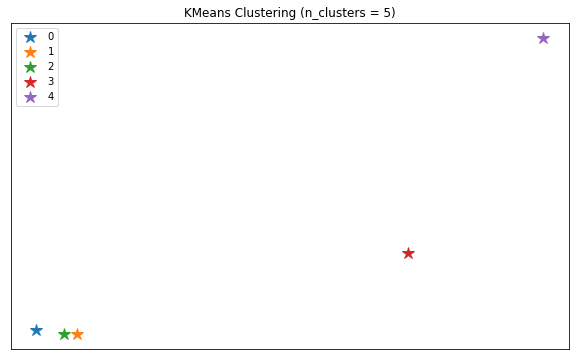

In [324]:
plt.figure(figsize=(10,6))
for i in range(len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],'*', markersize=12, label=i);
    plt.xticks([], [])
    plt.yticks([], [])
    plt.legend()
plt.title('KMeans Clustering (n_clusters = 5)');

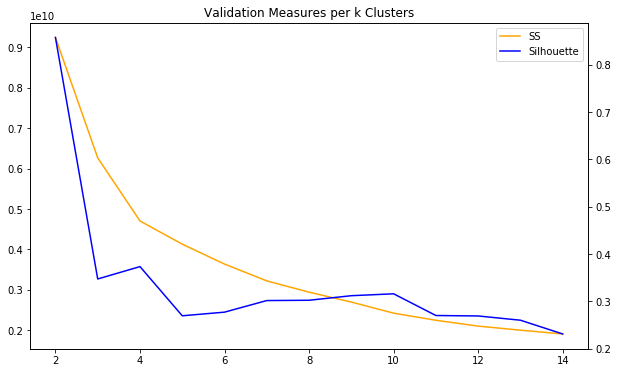

In [325]:
from sklearn.metrics import silhouette_score
sse = []
silhouette = []
krange = range(2, 15)
plt.figure(figsize=(10,6))
for k in krange:
    kmeans = KMeans(n_clusters = k).fit(X)
    sse.append(kmeans.inertia_)
    
    labels = kmeans.predict(X)
    sl = silhouette_score(X, labels)
    silhouette.append(sl)
    
plt.plot(krange, sse, label='SS', c='orange')
lines, labels = plt.gca().get_legend_handles_labels()
plt.twinx()
plt.plot(krange, silhouette, label = 'Silhouette', c='blue')
lines2, labels2 = plt.gca().get_legend_handles_labels()
plt.legend(lines+lines2, labels+labels2)
plt.title("Validation Measures per k Clusters")
plt.show()

In [265]:
# def k_means(df,no_of_clusters):
#     kmeans = KMeans(n_clusters=no_of_clusters)
#     kmeans_model = kmeans.fit(df)
#     return kmeans

# def elbow(df):
#     wcss = []
#     for i in range(1,11):
#         kmeans = k_means(df,i)
#         wcss.append(kmeans.inertia_) #within-cluster sums of squares
#     plt.plot(range(1,11),wcss)
#     plt.title('The Elbow Method')
#     plt.xlabel('Number of clusters')
#     plt.ylabel('WCSS')
#     plt.show()
    

# elbow(X)

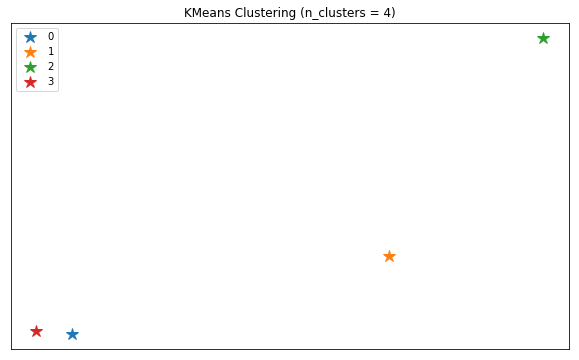

In [326]:
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters).fit(X)
plt.figure(figsize=(10,6))
for i in range(len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],'*', markersize=12, label=i);
    plt.xticks([], [])
    plt.yticks([], [])
    plt.legend()
plt.title('KMeans Clustering (n_clusters = {})'.format(n_clusters));

In [331]:
# clusters_list = {}
# for c in range(n_clusters):
#     clusters_list[c] = df.iloc[X.iloc[kmeans.labels_ == c, :].index]['Donor ID']

# df_sample_1.iloc[X.iloc[kmeans.labels_==0,:].index]['Donor ID']

# checker1 = df_sample[df_sample['School State']=='Alaska'].index.tolist()
# checker2 = df_sample[df_sample['School Metro Type']=='town'].index.tolist()

X.iloc[kmeans.labels_==0,:]

# df.iloc[X.iloc[kmeans.labels_==0,:].index]

,Resource Quantity,Resource Unit Price,Project Type,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Teacher Prefix,School Metro Type,School Percentage Free Lunch,School State,School City,School County,School District
3,1.0,13.83,2,22,215,3,1,390.66,2,4,78.0,48,1055,203,1039
4,4.0,18.99,2,26,217,3,13,492.09,2,1,85.0,20,1041,463,1023
5,1.0,4.12,2,30,238,0,13,310.69,2,3,51.0,14,1332,473,1933
8,1.0,10.00,2,22,215,0,1,690.55,2,2,69.0,8,929,734,1834
12,1.0,15.85,2,22,215,3,1,691.66,3,4,75.0,4,1031,419,1011
17,1.0,9.97,2,3,66,2,1,782.55,3,3,90.0,4,1031,419,1011
18,4.0,7.20,2,31,8,0,13,418.74,3,4,95.0,34,1832,423,1798
19,1.0,19.39,2,22,215,0,1,645.64,3,4,95.0,37,1415,553,1378
20,6.0,11.99,2,26,228,3,13,907.26,3,1,53.0,12,2017,227,1984
24,1.0,4.34,2,22,215,0,1,584.95,1,1,63.0,46,1669,371,1473


In [332]:
df_sample_1.iloc[9998]

Project ID                                              96679e2f4137a50150ec435df7bcfc9f
Donation ID                                             881b86cce6668893c790dd6c91c5151e
Donor ID                                                07bc98f593ca85118ebb43c5f13e7cd3
Donation Included Optional Donation                                                  Yes
Donation Amount                                                                       25
Donor Cart Sequence                                                                    1
Donation Received Date                                               2017-01-31 21:38:09
Resource Item Name                     english scrabble original board game and trave...
Resource Quantity                                                                      1
Resource Unit Price                                                                12.79
Resource Vendor Name                                                     Amazon Business
Donor City           

In [333]:
clusters_list = {}
for c in range(n_clusters):
    clusters_list[c] = df_sample_1.iloc[X.iloc[kmeans.labels_ == c, :].index]['Donor ID']

In [334]:
X['Label'] = kmeans.labels_

In [402]:
X['Label'].value_counts()

0    4158
3    3256
1     722
2      26
Name: Label, dtype: int64

In [335]:
X.shape

(8162, 16)

In [336]:
X.head()

,Resource Quantity,Resource Unit Price,Project Type,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Teacher Prefix,School Metro Type,School Percentage Free Lunch,School State,School City,School County,School District,Label
0,1.0,279.99,2,30,17,0,14,707.25,1,4,43.0,32,984,112,235,3
3,1.0,13.83,2,22,215,3,1,390.66,2,4,78.0,48,1055,203,1039,0
4,4.0,18.99,2,26,217,3,13,492.09,2,1,85.0,20,1041,463,1023,0
5,1.0,4.12,2,30,238,0,13,310.69,2,3,51.0,14,1332,473,1933,0
7,1.0,499.00,2,28,223,1,14,782.07,2,4,86.0,12,296,183,334,3


In [337]:
X.tail()

,Resource Quantity,Resource Unit Price,Project Type,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Teacher Prefix,School Metro Type,School Percentage Free Lunch,School State,School City,School County,School District,Label
9995,1.0,14.99,2,30,129,3,13,480.76,2,3,95.0,21,19,114,1075,3
9996,1.0,10.59,2,25,222,0,1,580.26,2,0,59.0,43,1166,284,672,3
9997,1.0,39.95,2,8,178,3,12,1107.66,3,4,92.0,4,1314,8,1283,0
9998,1.0,12.79,1,3,148,2,13,541.94,3,4,89.0,31,1274,86,1221,0
9999,1.0,22.20,2,18,207,1,0,171.04,3,4,65.0,31,1274,496,1222,0


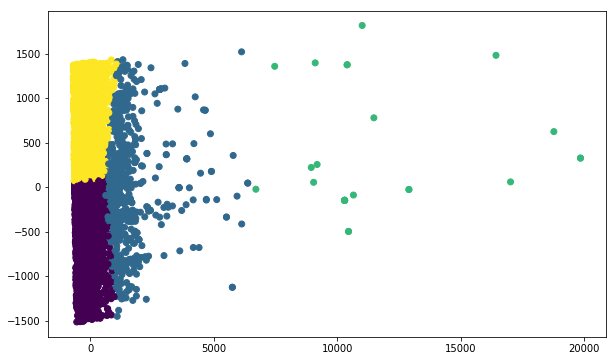

In [338]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3).fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(pca[:,0],pca[:,1], c = kmeans.labels_);

## Classifying New Unobserved Items

In [340]:
X_ = X.drop('Label', axis = 1)
y_ = X['Label']

For C = 0.001000 , Train accuracy is: 0.885966
For C = 0.001000 , Test accuracy is: 0.893680
**************************
For C = 0.100000 , Train accuracy is: 0.954583
For C = 0.100000 , Test accuracy is: 0.952474
**************************
For C = 0.750000 , Train accuracy is: 0.957033
For C = 0.750000 , Test accuracy is: 0.952474
**************************
For C = 1.000000 , Train accuracy is: 0.956380
For C = 1.000000 , Test accuracy is: 0.952964
**************************
For C = 5.000000 , Train accuracy is: 0.957687
For C = 5.000000 , Test accuracy is: 0.951984
**************************
For C = 10.000000 , Train accuracy is: 0.957360
For C = 10.000000 , Test accuracy is: 0.952474
**************************


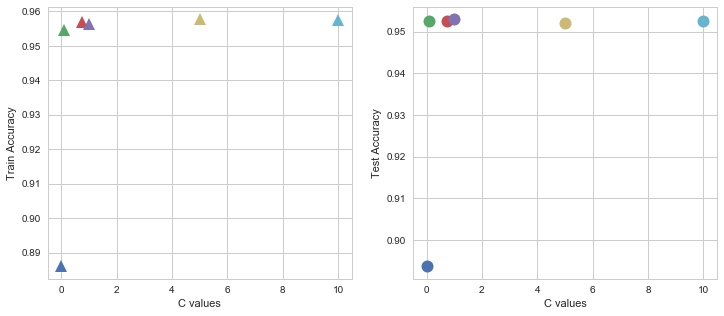

In [371]:
C = [0.001,0.1, 0.75, 1, 5, 10]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_, y_, test_size = 0.25, 
                                                    random_state = 123)

fig = plt.figure(figsize=(12,5))

for n in C:
    clf1 = LogisticRegression(C = n, penalty='l1').fit(X_train1, y_train1)
    plt.subplot(121)
    plt.plot(n,clf1.score(X_train1, y_train1),'^',markersize=12)
    plt.xlabel("C values")
    plt.ylabel("Train Accuracy")
    plt.subplot(122)
    plt.plot(n,clf1.score(X_test1, y_test1),marker='o', markersize=12)
    plt.xlabel("C values")
    plt.ylabel("Test Accuracy")
    print("For C = %f , Train accuracy is: %f" %(n,clf1.score(X_train1, y_train1)))
    print("For C = %f , Test accuracy is: %f" %(n,clf1.score(X_test1, y_test1)))
    print("**************************") 

<font size = 3> It can be said from the above plots that C = 10.0 and regularization = 'L1' gives the best Training and Testing Accuracy. Hence, We will see the other metrics related to the same <br>

We have also used MultiNomial Logistic Regression as we have multi-class classification and compared the metrics between both the methods</font>

In [409]:
from sklearn import linear_model

lr = linear_model.LogisticRegression(C=10,penalty='l1')
lr.fit(X_train1, y_train1)

mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train1, y_train1)

print ("Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train1, lr.predict(X_train1)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test1, lr.predict(X_test1)),"\n")
    
print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train1, mul_lr.predict(X_train1)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test1, mul_lr.predict(X_test1)))

Logistic regression Train Accuracy ::  0.9573599085116811
Logistic regression Test Accuracy ::  0.951984321411073 

Multinomial Logistic regression Train Accuracy ::  0.9924848880901813
Multinomial Logistic regression Test Accuracy ::  0.9897109260166586


In [414]:
lr_pred = lr.predict(X_test1)

confusion_matrix = metrics.confusion_matrix(y_test1, lr_pred)
confusion_matrix

array([[1028,   13,    0,   12],
       [  26,  120,    0,   19],
       [   0,    5,    0,    0],
       [  15,    8,    0,  795]])

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      1053
          1       0.82      0.73      0.77       165
          2       0.00      0.00      0.00         5
          3       0.96      0.97      0.97       818

avg / total       0.95      0.95      0.95      2041



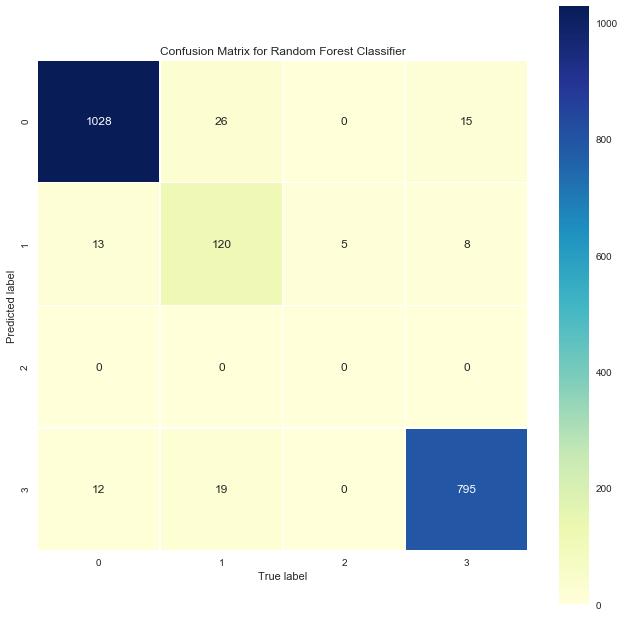

In [417]:
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Random Forest Classifier")
sns.heatmap(confusion_matrix.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=['0','1','2','3'],
            yticklabels=['0','1','2','3'],linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');

cls_RFC = classification_report(y_test1, lr_pred, target_names=['0','1','2','3'])
print(cls_RFC)

In [416]:
mul_lr_pred = mul_lr.predict(X_test1)
confusion_matrix_mul = metrics.confusion_matrix(y_test1, mul_lr_pred)
confusion_matrix_mul

array([[1042,    3,    0,    8],
       [   0,  163,    0,    2],
       [   0,    1,    4,    0],
       [   6,    1,    0,  811]])

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1053
          1       0.97      0.99      0.98       165
          2       1.00      0.80      0.89         5
          3       0.99      0.99      0.99       818

avg / total       0.99      0.99      0.99      2041



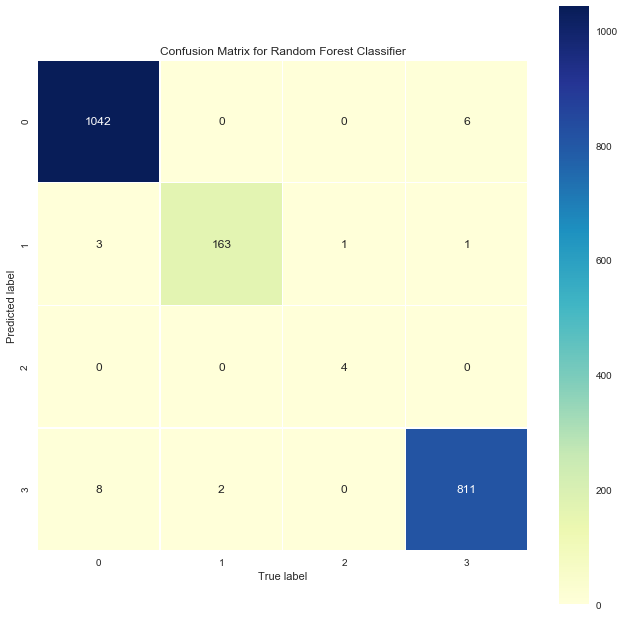

In [418]:
fig, ax = plt.subplots(figsize=(11,11))  
ax.set_title("Confusion Matrix for Random Forest Classifier")
sns.heatmap(confusion_matrix_mul.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=['0','1','2','3'],
            yticklabels=['0','1','2','3'],linewidths=.5, ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label');

cls_RFC_mul = classification_report(y_test1, mul_lr_pred, target_names=['0','1','2','3'])
print(cls_RFC_mul)

In [390]:
print(len(clf1.coef_[0]))
print(abs(clf1.coef_[0]))

print(len(np.argsort(abs(clf1.coef_[0]))))
sorted_i = np.argsort(abs(clf1.coef_[0]))[::-1] #Sorts the coefficient values and return its index, then reverses the array with [::-1]

print(sorted_i)

15
[3.84266861e-03 1.16967158e-03 3.96378527e-01 3.51510829e-03
 5.23515372e-04 2.60526418e-02 1.54388815e-02 5.54995601e-03
 5.56490815e-02 4.89815606e-02 5.33960127e-03 1.34997962e-02
 6.71681174e-03 3.83225666e-04 6.79599968e-03]
15
[ 2  8  9  5  6 11 14 12  7 10  0  3  1  4 13]


In [391]:
X_.columns

Index(['Resource Quantity', 'Resource Unit Price', 'Project Type',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Teacher Prefix', 'School Metro Type',
       'School Percentage Free Lunch', 'School State', 'School City',
       'School County', 'School District'],
      dtype='object')

In [389]:
X_.columns[sorted_i]

Index(['Project Type', 'Teacher Prefix', 'School Metro Type',
       'Project Grade Level Category', 'Project Resource Category',
       'School State', 'School District', 'School City', 'Project Cost',
       'School Percentage Free Lunch', 'Resource Quantity',
       'Project Subject Category Tree', 'Resource Unit Price',
       'Project Subject Subcategory Tree', 'School County'],
      dtype='object')

In [400]:
clf1.coef_[0]

array([ 3.84266861e-03,  1.16967158e-03, -3.96378527e-01,  3.51510829e-03,
       -5.23515372e-04, -2.60526418e-02, -1.54388815e-02, -5.54995601e-03,
        5.56490815e-02, -4.89815606e-02,  5.33960127e-03, -1.34997962e-02,
        6.71681174e-03, -3.83225666e-04,  6.79599968e-03])

In [399]:
clf1.coef_[0][sorted_i]

array([-3.96378527e-01,  5.56490815e-02, -4.89815606e-02, -2.60526418e-02,
       -1.54388815e-02, -1.34997962e-02,  6.79599968e-03,  6.71681174e-03,
       -5.54995601e-03,  5.33960127e-03,  3.84266861e-03,  3.51510829e-03,
        1.16967158e-03, -5.23515372e-04, -3.83225666e-04])

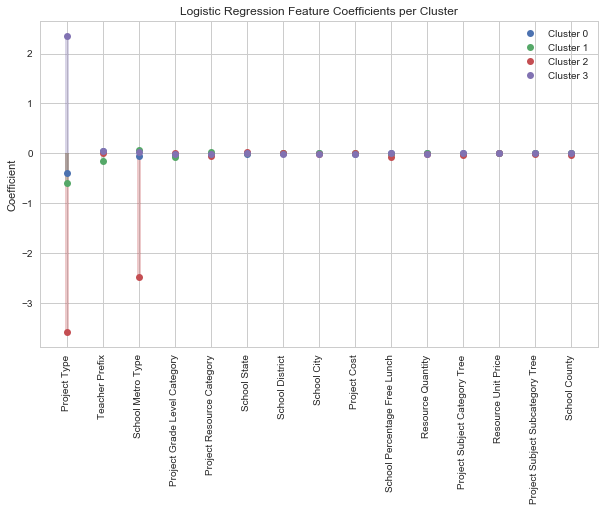

In [401]:
plt.figure(figsize=(10,6))
for i in range(n_clusters):
    sorted_i = np.argsort(abs(clf1.coef_[i]))[::-1]
    
    plt.plot(X_.columns[sorted_i], clf1.coef_[i][sorted_i], marker='o', linestyle='none', linewidth=1, label = "Cluster "+str(i))
    plt.bar(X_.columns[sorted_i], clf1.coef_[i][sorted_i], alpha=0.3, width=0.1)
    plt.legend()
    plt.xticks(rotation=90)
    plt.ylabel("Coefficient")
    plt.title("Logistic Regression Feature Coefficients per Cluster")
plt.show()